# Limieten

Dit werkblad overloopt de voornaamste basiscommando's in Sympy in verband met limieten van functies. Vooraleer je aan dit werkblad begint, moet je zeker het materiaal in Basiscommandos.ipynb en Functies.ipynb beheersen.

We beginnen met Sympy in te laden en alvast een aantal symbolen te reserveren voor later gebruik. Voer hiervoor onderstaande blok code uit.

In [1]:
import sympy as sp

from IPython.display import display
x,y = sp.symbols('x y', real=True)

Om limieten te behandelen kent Sympy twee commando's. Het *actieve* commando `limit(uitdrukking, variabele, punt)` voert een limietberekening uit, terwijl het *inerte* commando `Limit(uitdrukking, variabele, punt)` commando slechts de te berekenen limiet teruggeeft in de standaardnotatie. In het algemeen voert een actief commando de operatie meteen uit, terwijl een inert commando enkel de uit te voeren operatie teruggeeft.

**Opdracht 1:** Voer onderstaande commando's uit om de limiet $\lim_{x \rightarrow 2} \, \frac{x^2 - 4}{x-2}$ via verschillende wegen uit te rekenen. Om zicht te krijgen op het gedrag van de functie, maken we ook een plot.

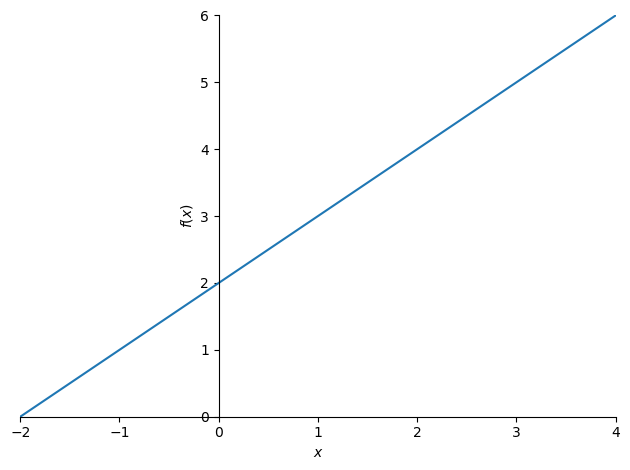

Limit((x**2 - 4)/(x - 2), x, 2, dir='+')

In [2]:
sp.plot((x**2 - 4) / (x-2), (x,-4,4), xlim = (-2,4), ylim = (0,6))
uitdr = sp.Limit((x**2 - 4) / (x-2), x, 2)
display(uitdr)

In [3]:
uitdr.doit()    # Inerte commando's kunnen worden uitgevoerd door .doit()

4

In [4]:
sp.limit((x**2 - 4) / (x-2), x, 2)

4

**Opdracht 2:** We beschouwen de functie met voorschrift $h(x) = \frac{\sqrt{x^2+25} - 5}{x^2}$.

- Definieer $h$ als uitdrukking.
- Toon aan dat $h$ een even functie is.
- Maak een plot van $h$. Kun je op basis hiervan een vermoeden formuleren wat de limiet in $x=0$ zal zijn?
- Gebruik Sympy om $\lim_{x \rightarrow 0} h(x)$ te berekenen.

In [5]:
x = sp.symbols('x', real=True)

h = sp.Function('h')
h = ((sp.sqrt(x**2 + 25) - 5)/x**2)
h

(sqrt(x**2 + 25) - 5)/x**2

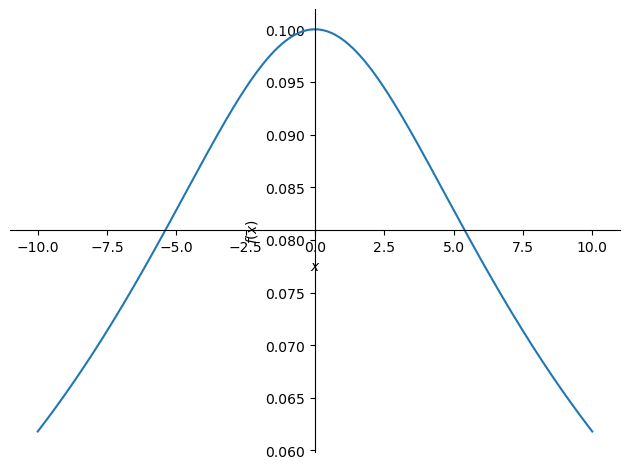

In [8]:
sp.solveset(sp.Eq(h, h.subs(x, -x)), domain=sp.S.Reals)

sp.plot(h, (x, -10, 10))

In [9]:
sp.limit(h, x, 0)

1/10

**Opdracht 3:** Definieer de functie $f$ die $y$ afbeeldt op $\frac{\sin y}{y}$. Toon aan dat $f$ een even functie is.

In [10]:
y = sp.symbols('y')

f = sp.Function('f')
f = sp.sin(y)/y

sp.solveset(sp.Eq(f, f.subs(y, -y)), domain=sp.S.Reals)

Reals

**Opdracht 4:** We kunnen zicht krijgen op het limietgedrag van $f$ in de buurt van 0 door de functie te evalueren in een aantal functiewaarden dichtbij 0. Dit kan zeer eenvoudig door gebruik te maken van lijsten in Python. Voer het volgende commando uit om dit te verwezenlijken.

In [11]:
[f.subs(y,t) for t in [-0.5,-0.1,-0.01, -0.001]]

[0.958851077208406, 0.998334166468282, 0.999983333416666, 0.999999833333342]

**Opdracht 5:** Gebruik Sympy om $\lim_{x \rightarrow 0} f(x)$ te berekenen.

In [12]:
sp.limit(f, y, 0)

1

**Opdracht 6:** Onderzoek het limietgedrag van $g(x) = \sin(1 / x)$ nabij $x=0$:

- Definieer de functie $g$.
- Maak een plot van $g$ op het interval $[-1, 1]$. Wat is je vermoeden omtrent het limietgedrag in 0?
- Vraag Sympy om $\lim_{x \rightarrow 0} g(x)$ te berekenen.

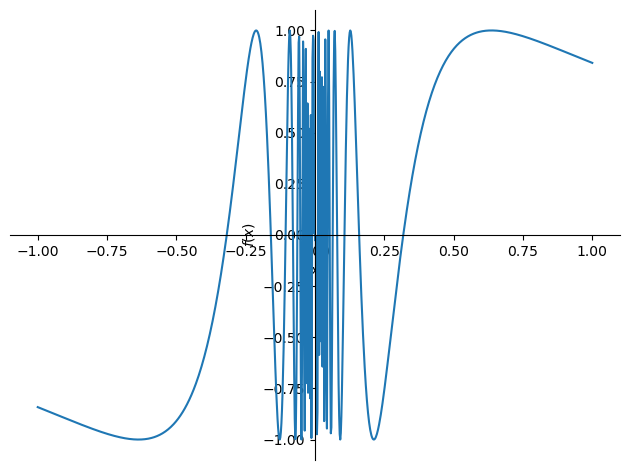

In [13]:
g = sp.Function('g')
g = sp.sin(1/x)

sp.plot(g, (x, -1, 1))

In [19]:
sp.Limit(g, x, 0)

Limit(sin(1/x), x, 0, dir='+')

## Linkerlimiet/rechterlimiet, limiet op oneindig

**Opdracht 7:** Vraag Sympy om $\lim_{x \rightarrow 0} \frac{1}{x}$ te berekenen. Gebruik zowel het inerte als het actieve commando. Wat valt je op?

In [23]:
sp.limit(1/x, x, 0)

oo

In [24]:
sp.Limit(1/x, x, 0).doit()

oo

Het gedrag dat we in de vorige opdracht waarnamen noopt dus tot enige voorzichtigheid. Het is vaak een goed idee om de betrokken functies ook te plotten om zo een zicht te krijgen op het limietgedrag van de functie.

Sympy kan echter ook linker- en rechterlimieten berekenen. Dit doen we door een extra argument `'+'` of `'-'` mee te geven aan de 'limit' functie. Voer volgende commando's uit om dit aan het werk te zien.

In [25]:
sp.limit(1/x, x, 0, '-')

-oo

In [26]:
sp.limit(1/x, x, 0, '+')

oo

Sympy kan ook limieten op oneindig berekenen. Het symbool $+ \infty$ wordt in Sympy voorgesteld door `sp.oo` (tweemaal de letter 'o' achter elkaar)

**Opdracht 8:**
- Zoek in de documentatie van Sympy op hoe je de absolute waarde $|x|$ kunt implementeren
- Bereken de limieten $\lim_{x \rightarrow -\infty} \frac{3x-2}{|x|+5}$ en $\lim_{x \rightarrow +\infty} \frac{3x-2}{|x|+5}$

In [27]:
sp.limit((3*x-2)/(sp.Abs(x)+5), x, sp.oo)

3

In [28]:
sp.limit((3*x-2)/(sp.Abs(x)+5), x, -sp.oo)

-3